<a href="https://colab.research.google.com/github/mehraj-alom/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

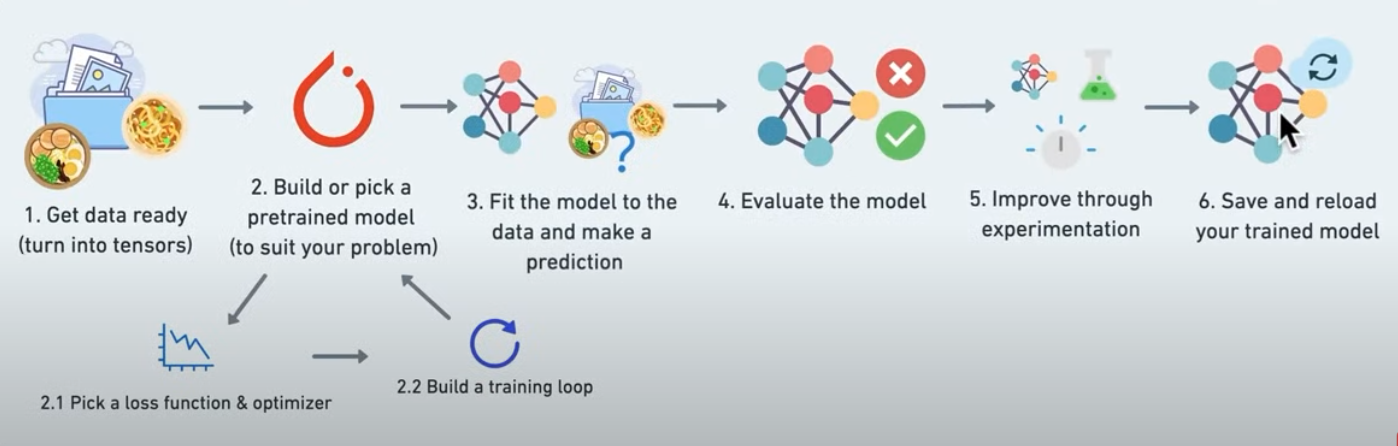

## |^ WORKFLOW

In [127]:
import matplotlib.pyplot as plt
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural
#networks
torch.__version__

'2.6.0+cu124'

# Data Preparing and Loading
  - Data can be of any types :
    * Image
    * Video
    * Audio (like songs or podcast)
    * DNA (haha)
    * Text
  - Machine learing is a game of two step
    1. Get data into numerical representation
    2. Build a model to learn patterns in that numerical representation

[IMAGE TO REFER](https://github.com/mehraj-alom/DATA/blob/main/Screenshot%202025-08-16%2002.28.33.png)


[IMAGE TO REFER](https://github.com/mehraj-alom/DATA/blob/main/Screenshot%202025-08-16%2002.33.34.png)





#- Generaliztion : The ability for a machine learning model to perform well on data it hasn't seen before



## Three Dataset (also Known as TRAIN_TEST/VAL_SPLIT)
  - TRAIN ▶ For Traing the model to learn the pattern
  - TEST ▶ For Testing The models performance
  - Val ▶ (Validation) For Validating the Model while training/ tune model pattern



In [128]:
tensor = torch.arange(0.0,0.1,0.001)
x = tensor
y = tensor*2
from sklearn.model_selection import train_test_split
# Split data into training and the rest (validation and test)
X_train, X_rest, y_train, y_rest = train_test_split(x, y, test_size=0.4, random_state=42) # 60% train, 40% rest

# Split the rest into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42) # 20% val, 20% test

print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_val: {len(X_val)}")
print(f"Length of X_test: {len(X_test)}")

Length of X_train: 60
Length of X_val: 20
Length of X_test: 20


# Function often required to visualize our data

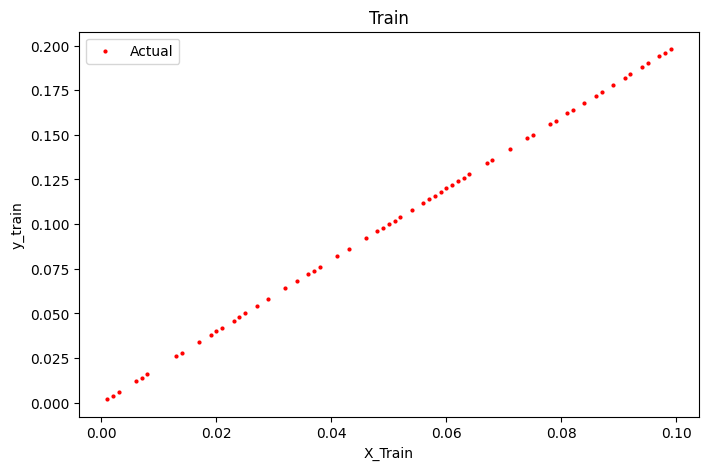

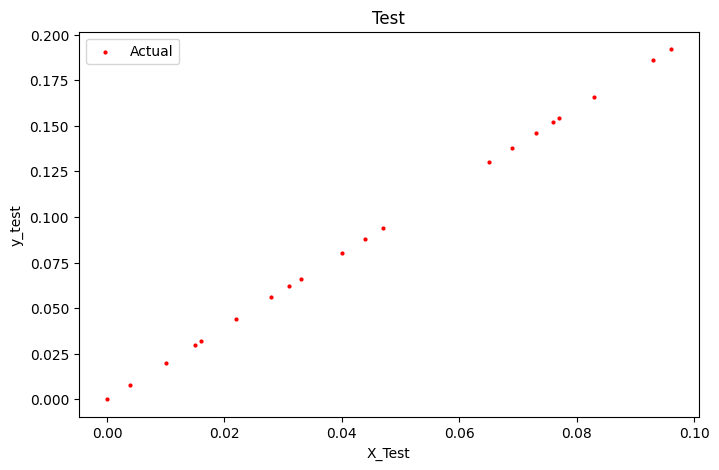

In [129]:
def visualize(x, y, label, x_label, y_label, prediction=None):
  plt.figure(figsize=(8, 5))
  # Detach tensors from computation graph before converting to numpy
  x_np = x.detach().numpy() if isinstance(x, torch.Tensor) and x.requires_grad else x.numpy() if isinstance(x, torch.Tensor) else x
  y_np = y.detach().numpy() if isinstance(y, torch.Tensor) and y.requires_grad else y.numpy() if isinstance(y, torch.Tensor) else y

  plt.scatter(x_np, y_np, c="r", s=4, label="Actual")
  if prediction is not None:
    # Detach prediction tensor as well
    prediction_np = prediction.detach().numpy() if isinstance(prediction, torch.Tensor) and prediction.requires_grad else prediction.numpy() if isinstance(prediction, torch.Tensor) else prediction
    plt.scatter(x_np, prediction_np, c="b", s=4, label="Prediction")
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(label)
  plt.show()

visualize(X_train, y_train, "Train", "X_Train", "y_train")
visualize(X_test, y_test, "Test", "X_Test", "y_test")

# Linear Regression Model (1st Model)

In [130]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float,
                                           ))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    return self.weights * x + self.bias

**What Actually happens in pytorch linear regression Model**
 - 3blue1brown

In [131]:
torch.manual_seed(43)
model = LinearRegressionModel()
print(list(model.parameters()))
print("\nlist_named_parameters")
model.state_dict()

[Parameter containing:
tensor([0.4540], requires_grad=True), Parameter containing:
tensor([0.1965], requires_grad=True)]

list_named_parameters


OrderedDict([('weights', tensor([0.4540])), ('bias', tensor([0.1965]))])

**Our Random Linear Model Inference**
 * `torch.inference_mode()`

 X_train_len:144 y_test_len36
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False])


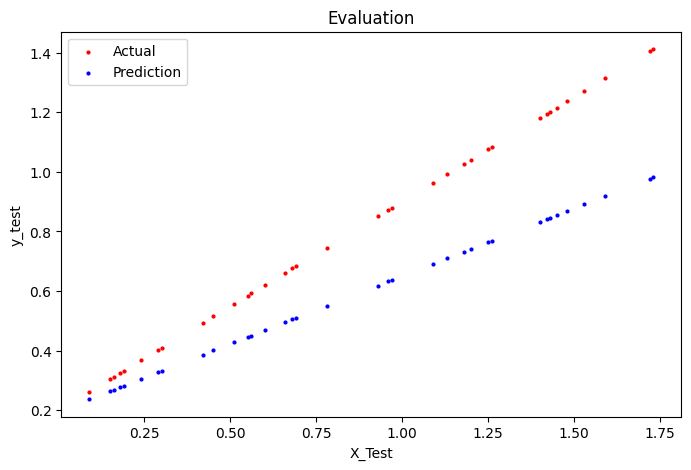

In [132]:
torch.manual_seed(42)
weight = 0.7
bias = 0.2
# Ensure X and Y have the same number of elements
X = torch.arange(0.0, 180/100.0, 1/100.0) # Create X with 180 elements
Y = weight*X + bias # Calculate Y based on the new X with 180 elements

from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(f" X_train_len:{len(X_train)} y_test_len{len(y_test)}")


with torch.inference_mode():
  y_pred = model(X_test)
print(y_pred == y_test)
visualize(X_test,y_test,"Evaluation","X_Test","y_test",y_pred) # Pass y_test as actual and y_pred as prediction

# Pytorch Important Model building Classes
 * `torch.nn` Contains all the model building blocks for computational graphs(neural network)
 * `torch.nn.Parameters` - what parameter should our model try and learn
 * `torch.nn.module` - Base class for all neural network modules *note : if you subclass it , you should overwrite `forward()`
 * `torch.optim` - for optimization of the learning and performance of the network (Help in gradient Descent)
 * `torch.utils.data.Dataset` -Inbuilt Dataset in pytorch
 * `torch.utils.data.DataLoader` - Create a python iterable over a torch Dataset


# Model Training Intution
  - (Maybe the things we need)

**Loss Function :** A function to measure how wrong your model's Prediction are to the ideal outputs , the less it is the more good is the model
**Optimizer :** Takes into account the loss of a model and adjusts the model's Parameter(Can be reffered as weights and biases) --> `model_name.state_dict()`.

- and specifically for pytorch we need
  - A training loop
  - A testing loop  


- So Let's Setup the Loss_function and optimizer

In [133]:
# loss function
loss_fn = nn.L1Loss() # MAE
# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01,
                            )

Building a training loop in PyTorch involves the following steps:

- Loop through the data:
Iterate over the dataset during training.
- Forward pass:
Data moves through the model's forward() function to make predictions, also known as forward propagation.
- Calculate the loss:
Compare the predictions from the forward pass to the ground truth labels to quantify the error.
- Optimizer zero grad:
Clear the gradients of all optimized torch.Tensors before calculating new gradients.
- Loss backward:
Perform backpropagation to calculate the gradients of each parameter in the model with respect to the loss.
- Optimizer step:
Adjust the model's parameters using the optimizer to minimize the calculated loss and improve the model's performance.(gradient Descent)

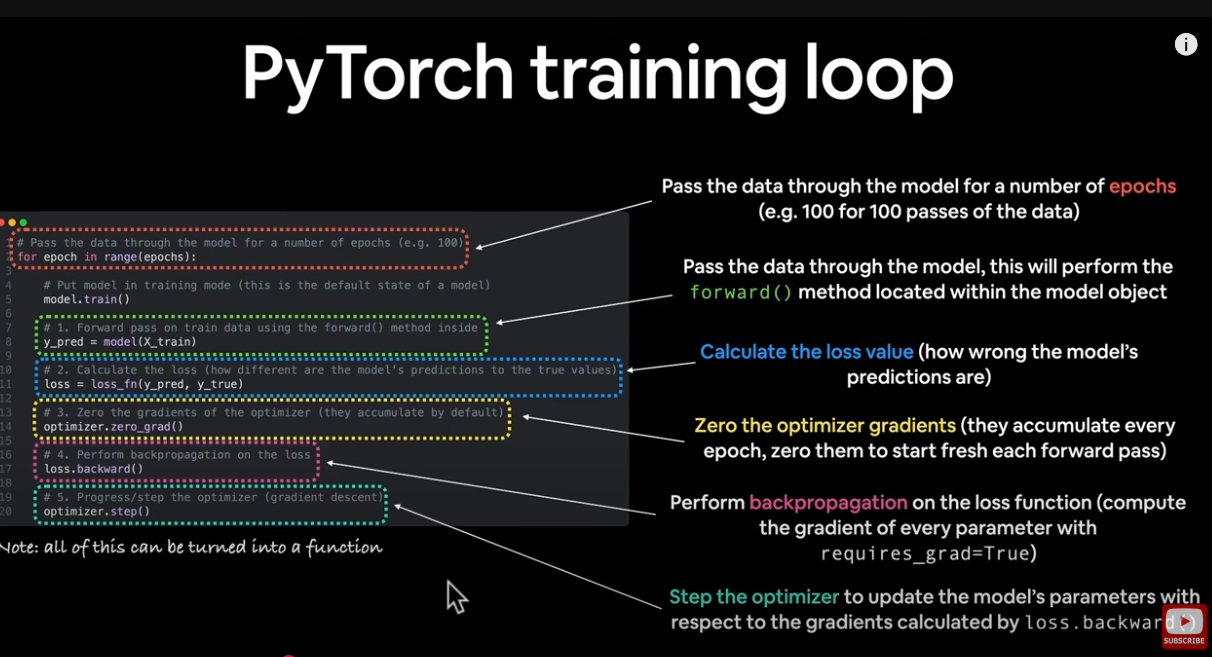

In [134]:
epochs = 60
epoch_count = []
loss_values = []
test_loss_values = []
#Loop through the data
for epoch in range(epochs):
  model.train()
  #Forward Pass
  y_pred = model(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred,y_train)

  #Optimizer zero grad
  optimizer.zero_grad()

  #Perform backpropogation of the loss with resp. to parametrs of the model
  loss.backward()

  #perform gradient descent
  optimizer.step()


  model.eval() # turns off differnt settings that not needed in testing/evaluation
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 5 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} , Loss: {loss} , Test_loss: {test_loss}")
    print(model.state_dict())

Epoch : 0 , Loss: 0.2254156768321991 , Test_loss: 0.19905108213424683
OrderedDict([('weights', tensor([0.4630])), ('bias', tensor([0.2065]))])
Epoch : 5 , Loss: 0.1454748511314392 , Test_loss: 0.12317553907632828
OrderedDict([('weights', tensor([0.5076])), ('bias', tensor([0.2493]))])
Epoch : 10 , Loss: 0.08850884437561035 , Test_loss: 0.07494974881410599
OrderedDict([('weights', tensor([0.5492])), ('bias', tensor([0.2794]))])
Epoch : 15 , Loss: 0.05681672319769859 , Test_loss: 0.05258975550532341
OrderedDict([('weights', tensor([0.5833])), ('bias', tensor([0.2945]))])
Epoch : 20 , Loss: 0.044402848929166794 , Test_loss: 0.043240971863269806
OrderedDict([('weights', tensor([0.6059])), ('bias', tensor([0.2948]))])
Epoch : 25 , Loss: 0.03844902664422989 , Test_loss: 0.037684813141822815
OrderedDict([('weights', tensor([0.6201])), ('bias', tensor([0.2864]))])
Epoch : 30 , Loss: 0.03336356580257416 , Test_loss: 0.032538507133722305
OrderedDict([('weights', tensor([0.6316])), ('bias', tenso

In [135]:
model.state_dict()

OrderedDict([('weights', tensor([0.6936])), ('bias', tensor([0.2070]))])

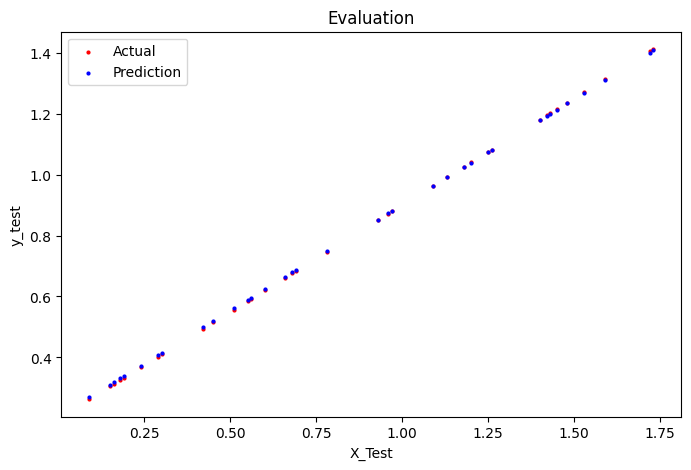

In [136]:
with torch.inference_mode():
  y_pred_trained = model(X_test) # Generate predictions using the trained model
visualize(X_test,y_test,"Evaluation","X_Test","y_test",y_pred_trained)

## Compare with the previous test result

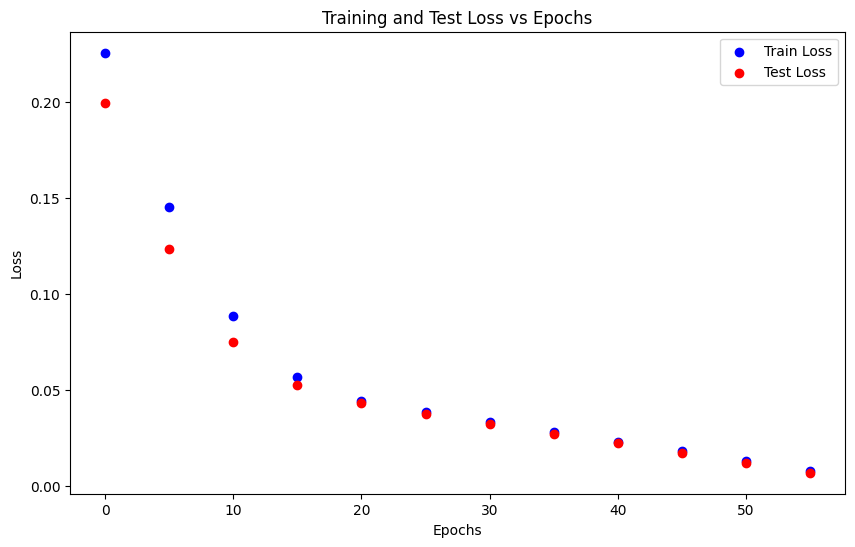

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(epoch_count,[loss.detach().numpy() for loss in loss_values],c="blue")
plt.scatter(epoch_count,[test_loss.detach().numpy() for test_loss in test_loss_values],c="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss vs Epochs")
plt.legend(["Train Loss", "Test Loss"])
plt.show()

# Save Pytorch Model

In [138]:
from pathlib import Path
#Create the directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create Model_save_path
MODEL_NAME = "01_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#Save model state dict
print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to : Models/01_model.pth


In [140]:
# import pickle # Not needed when weights_only is True
Model = torch.load(f="Models/01_model.pth", map_location=None, weights_only=True)

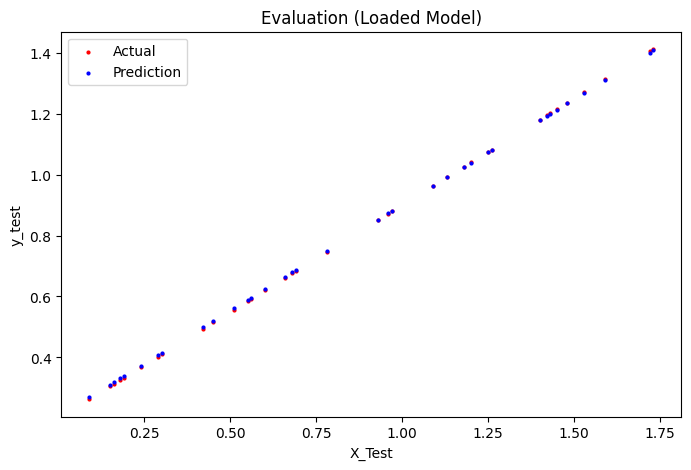

In [143]:
# Instantiate a new model
loaded_model = LinearRegressionModel()

# Load the saved state_dict into the new model
loaded_model.load_state_dict(torch.load(f="Models/01_model.pth"))

# Set the model to evaluation mode
loaded_model.eval()

# Make predictions with the loaded model
with torch.inference_mode():
  y_pred_loaded = loaded_model(X_test)

# Visualize the predictions
visualize(X_test, y_test, "Evaluation (Loaded Model)", "X_Test", "y_test", y_pred_loaded)

In [ ]:
# time 7:45